In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model


# Model = VGG16
# model = Model(weights="imagenet")
model = load_model('../models/standard_model_preprocessed.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 144, 144, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 70, 70, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 35, 35, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 128)      

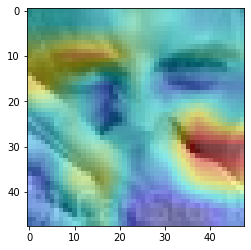

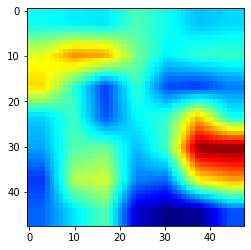

In [9]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
import numpy as np
from keras_conv_visualizer.gradcam import GradCAM

# img_path = '../keras_grad_cam/images/beagle.jpg'
img_path = '../data/stretched/train/1/2625.png'
cam = GradCAM(model)
# load the input image from disk (in Keras/TensorFlow format) and preprocess it
image = load_img(img_path, target_size=(144, 144), color_mode='grayscale')
image = img_to_array(image)
image /= 255
# image = imagenet_utils.preprocess_input(image)
heatmap, output = cam.make_superimposed_img(image, img_path, alpha=0.6)
import matplotlib.pyplot as plt
plt.imshow(output)
plt.figure()
plt.imshow(heatmap)

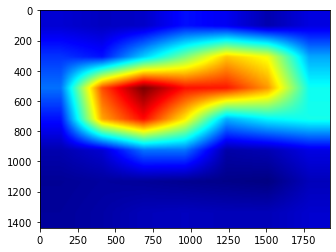

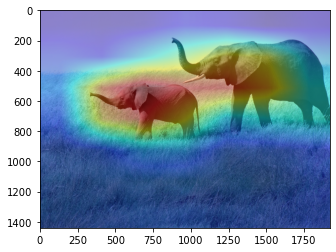

In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16, imagenet_utils
import matplotlib.pyplot as plt
from keras_conv_visualizer.gradcam import GradCAM

img_path = '../data/elephant.jpg'

# load the input image from disk (in Keras/TensorFlow format) and preprocess it
image = load_img(img_path, target_size=(224, 224))
image = img_to_array(image)
image = imagenet_utils.preprocess_input(image)

model = VGG16(weights="imagenet", input_shape=(224, 224, 3))

cam = GradCAM(model)
# First parameter - image tensor, second - image path, third - alpha value for heatmap (transparency)
heatmap, output = cam.make_superimposed_img(image, img_path, alpha=0.6)

plt.imshow(heatmap)
plt.savefig('../data/heatmap.png')
plt.figure()
plt.imshow(output)
plt.savefig('../data/superimposed.png')